# Import some packages

You should load packages you may need in this project first

In [1]:
import skimage.io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


# Load character data from the dataset subfolder


In [2]:
DATASET_DIR = 'D:\Y3S2\workshop\Project6\File for students-20200430\dataset'
classes = os.listdir(DATASET_DIR)
data = []
for cls in classes:
    files = os.listdir(DATASET_DIR+"/"+cls)
    for f in files:
        img = skimage.io.imread(DATASET_DIR + "/"+cls+"/"+f)
        img = skimage.color.rgb2gray(img)
        data.append({
            'x': img,
            'y': cls
        })

random.shuffle(data)

# create train data set and test data set 
Using 80/20 rule, 80 precent for trainning, and 20 percent for testing.

In [3]:
X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

x_train = np.array(X[:int(len(X)*0.8)])
y_train = np.array(y[:int(len(X)*0.8)])

x_test = np.array(X[int(len(X)*0.8):])
y_test = np.array(y[int(len(X)*0.8):])

# Examming and Understand data set for trainning


In [4]:
# you may print out some infomation about train data set 
print(x_train[0])
print(y_train)
print(len(y_train))

[[  0.   2.   3.   0.   3.   0.   0.  30.   2.   0.   0.  17.  37.   0.
    0.   1.   0.   2.   0.   0.]
 [  2.   0.   0.   1.   0.   0. 112. 221.  50.   3.  16. 176. 255.   1.
    0.   0.   0.   1.   0.   0.]
 [  0.   0.   3.   1.   1.   0. 240. 254. 114.   2.  11. 152. 253.   0.
    4.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1. 233. 241. 109.   0.   0.   3. 195.   0.
    2.   0.   1.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   0.   0.   2.   0.   0.  90. 167. 255.  87.
   86.  88.   6.   0.   0.   0.]
 [  0.   0.   0.   0.   3.   1. 156.   1.   0. 147. 251. 254. 251. 255.
  255. 255.  11.   0.   1.   1.]
 [  2.   0.   2.   1.   0. 157. 253. 181.   4.   5. 255. 146.  14.  14.
   93. 255.  14.   0.   1.   1.]
 [  0.   1.   0.   0.   0.   2. 184. 239.  85.   0. 253. 142.   0.   0.
   90. 255.  14.   0.   0.   1.]
 [  0.   0.   0.   1.   2.   0.   2.  85.   0.   0. 255. 142.   0.   0.
   89. 255.  13.   0.   0.   1.]
 [  0.   3.   2.   0.   0.   0.   0.   0.   1.   0. 254

# Decide a few parameters for trainning

such as batch size, epochs, image size in rows and colomns, etc.

In [5]:
batch_size = 128
num_classes = len(classes)
epochs =  10

## input image dimensions
img_rows, img_cols = 20, 20

# Data normalization

In [6]:
def extend_channel(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

x_train = extend_channel(x_train)
x_test = extend_channel(x_test)

input_shape = x_train.shape[1:]

In [7]:
#keras.utils.to_categorical()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (12920, 20, 20, 1)
12920 train samples
3231 test samples


# Create a CNN model for character recognition

This is an important part of this project. You have to create a cnn model using tensorflow and keras to train the data.


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Compile the model

In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

# Train your model


In [52]:
history = model.fit(x_train, y_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test2))

Train on 12920 samples, validate on 3231 samples
Epoch 1/10
12920/12920 [==============================] - 21s 2ms/step - loss: 0.0550 - accuracy: 0.9849 - val_loss: 0.0997 - val_accuracy: 0.9833
Epoch 2/10
12920/12920 [==============================] - 23s 2ms/step - loss: 0.0614 - accuracy: 0.9839 - val_loss: 0.1007 - val_accuracy: 0.9824
Epoch 3/10
12920/12920 [==============================] - 23s 2ms/step - loss: 0.0499 - accuracy: 0.9865 - val_loss: 0.1123 - val_accuracy: 0.9796
Epoch 4/10
12920/12920 [==============================] - 24s 2ms/step - loss: 0.0571 - accuracy: 0.9839 - val_loss: 0.1006 - val_accuracy: 0.9820
Epoch 5/10
12920/12920 [==============================] - 23s 2ms/step - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.1114 - val_accuracy: 0.9802
Epoch 6/10
12920/12920 [==============================] - 22s 2ms/step - loss: 0.0477 - accuracy: 0.9868 - val_loss: 0.1041 - val_accuracy: 0.9811
Epoch 7/10
12920/12920 [==============================] - 22s 2ms/ste

# Visualize training results

In [57]:
epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

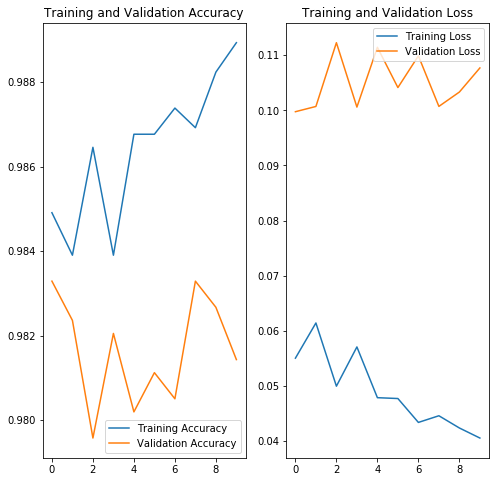

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation 

Evaluate your model with test dataset.

make sure your model accuracy should be more than 99 percent. Otherwise, you have to go back to fine tune your model with whatever methods you have learned to improve its accuracy. You have to handle over-fitting or under-fitting problem you may encounter.

In [59]:
score = model.evaluate(x_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1076758031335557
Test accuracy: 0.9814298748970032


# Save your model weights

You should save your model for car plate recognition purpose later.


In [13]:
model.save_weights('char_cnn.h5')